<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB_5 Сравнение статистических свойств разных точечных оценок математического ожидания и дисперсии.

Цели и задачи л/р: выполнить массовое статистическое моделирование, направленное на изучение статистических свойств разных точечных оценок математического ожидания и дисперсии, сравнение с теоретически ожидаемыми свойствами, верная статистическая интерпретация результатов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10 ** 3  # Количество выборок
n_values = range(10, 101, 10)  # Размеры выборок от 10 до 100

# Хранение результатов
means = {}
variances_unbiased = {}
variances_biased = {}

# Генерация выборок и оценка
for n in n_values:
    means[n] = []
    variances_unbiased[n] = []
    variances_biased[n] = []

    for _ in range(N):
        sample = np.random.normal(0, 1, n)  # выборка
        sample_mean = np.mean(sample)  #  математического ожидание
        unbiased_variance = np.var(sample, ddof=0)  # Неисправленная дисперсия
        biased_variance = np.var(sample, ddof=1)  # Исправленная  дисперсия

        means[n].append(sample_mean)
        variances_unbiased[n].append(unbiased_variance)
        variances_biased[n].append(biased_variance)

In [ ]:
# Оценка средних и дисперсий
mean_M = {n: np.mean(means[n]) for n in n_values}
variance_M = {n: np.var(means[n], ddof=1) for n in n_values}

unbiased_var_M = {n: np.mean(variances_unbiased[n]) for n in n_values}
unbiased_var_V = {n: np.var(variances_unbiased[n], ddof=1) for n in n_values}

biased_var_M = {n: np.mean(variances_biased[n]) for n in n_values}
biased_var_V = {n: np.var(variances_biased[n], ddof=1) for n in n_values}

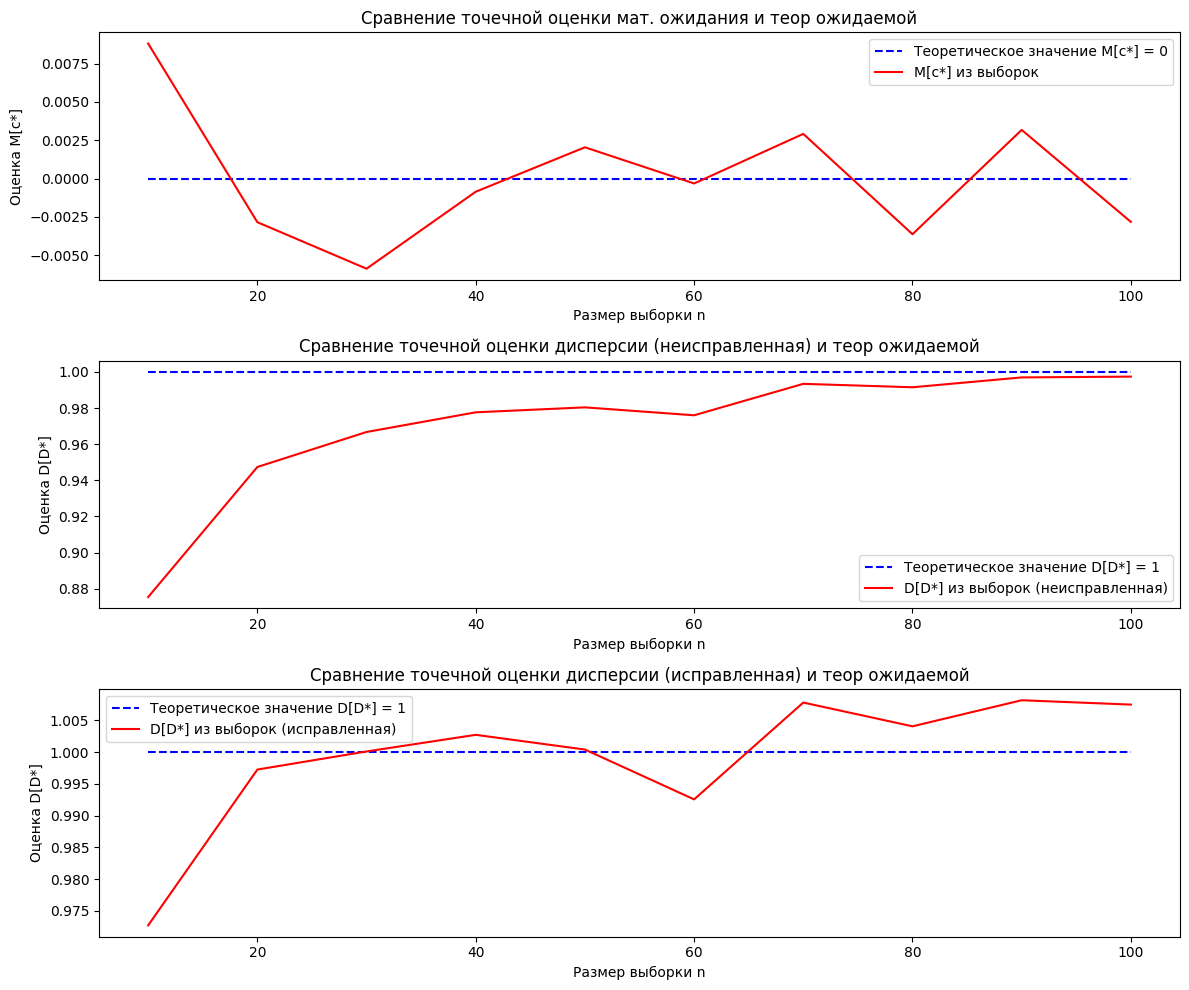

In [ ]:
# Построение графиков
plt.figure(figsize=(12, 10))

# Математическое ожидание
plt.subplot(3, 1, 1)
plt.plot(n_values, [0] * len(n_values), color='blue', label='Теоретическое значение M[c*] = 0', linestyle='dashed')
plt.plot(n_values, list(mean_M.values()), color='red', label='M[c*] из выборок')
plt.title('Сравнение точечной оценки мат. ожидания и теор ожидаемой')
plt.xlabel('Размер выборки n')
plt.ylabel('Оценка M[c*]')
plt.legend()

# Дисперсия
plt.subplot(3, 1, 2)
plt.plot(n_values, [1] * len(n_values), color='blue', label='Теоретическое значение D[D*] = 1', linestyle='dashed')
plt.plot(n_values, list(unbiased_var_M.values()), color='red', label='D[D*] из выборок (неисправленная)')
plt.title('Сравнение точечной оценки дисперсии (неисправленная) и теор ожидаемой')
plt.xlabel('Размер выборки n')
plt.ylabel('Оценка D[D*]')
plt.legend()

# Дисперсия с исправлением
plt.subplot(3, 1, 3)
plt.plot(n_values, [1] * len(n_values), color='blue', label='Теоретическое значение D[D*] = 1', linestyle='dashed')
plt.plot(n_values, list(biased_var_M.values()), color='red', label='D[D*] из выборок (исправленная)')
plt.title('Сравнение точечной оценки дисперсии (исправленная) и теор ожидаемой')
plt.xlabel('Размер выборки n')
plt.ylabel('Оценка D[D*]')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print('meanM', mean_M)
print(variances_biased)
print('поп', variances_unbiased)

meanM {10: 0.008803834537599711, 20: -0.0028452137187009435, 30: -0.005879840799627413, 40: -0.0008590892798575434, 50: 0.002039584088955257, 60: -0.00032087173000466086, 70: 0.002914329566471557, 80: -0.0036310030086911197, 90: 0.003174314033586009, 100: -0.0028254213501746825}
{10: [1.4368173766845898, 1.211120237897137, 1.0699509778120924, 1.1229032013156077, 0.6369569576995191, 0.9865221411591768, 2.638294200968782, 1.082975302408101, 0.5138249779465033, 1.3778079124183427, 1.1337586128904125, 0.9609061979779613, 0.9499107387691963, 0.40366404386696475, 0.5554556439354054, 1.0257204911992819, 0.6035939188506516, 0.9879483056849045, 1.2034874202007706, 1.3416136847367874, 0.9025855753904042, 0.6316947104306228, 0.6725976409991006, 1.127773717613013, 1.248195846575114, 0.4595820812370236, 1.4638821214826743, 0.3910341515009548, 0.8800047670016206, 0.7173299147903355, 1.2315460694280556, 1.0442917655148023, 0.8097054705696362, 1.303728694172667, 0.8979623252813939, 1.470201269175983, 

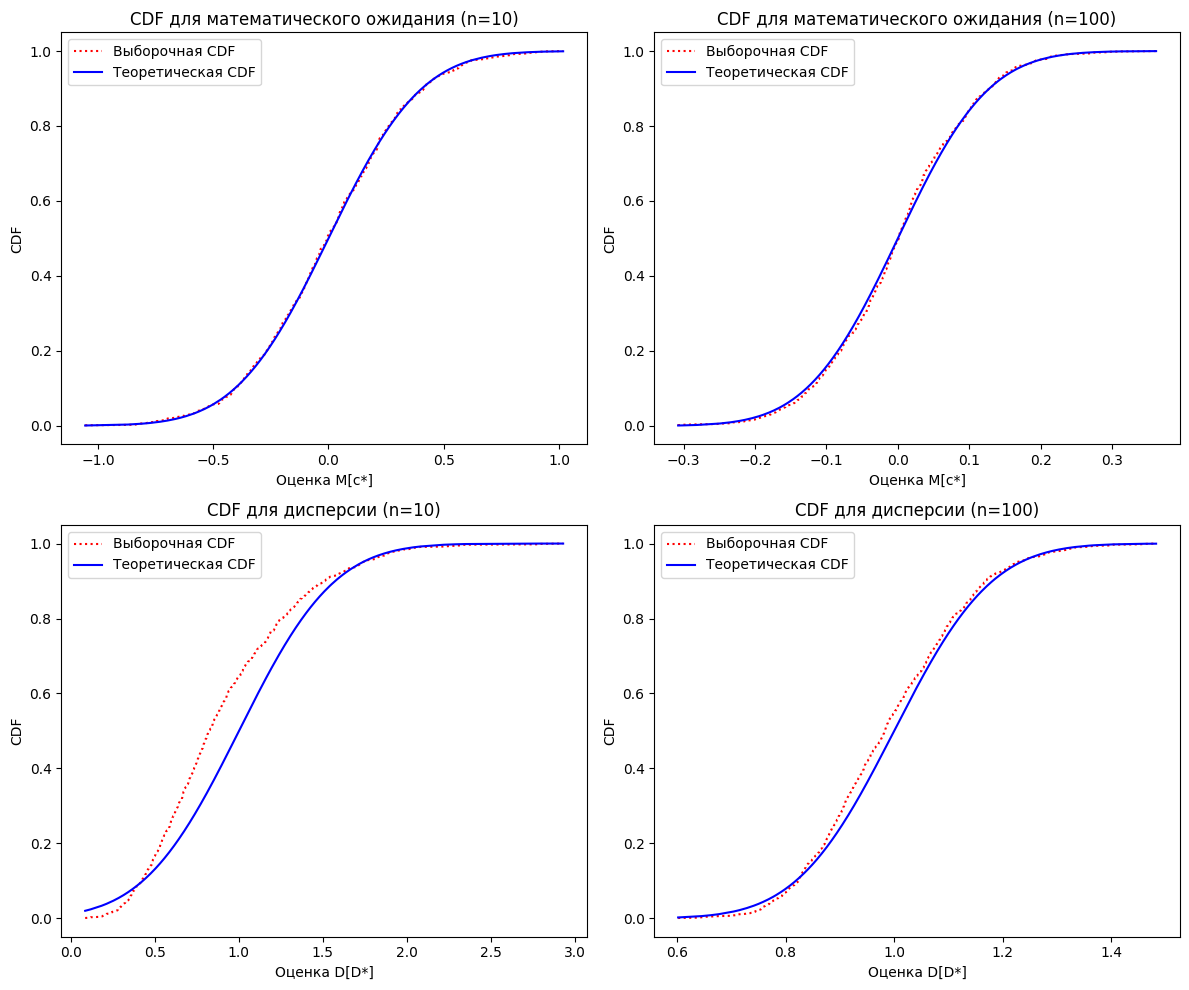

In [ ]:
# Параметры для построения функций распределения
sample_sizes = [10, 100]

plt.figure(figsize=(12, 10))

for idx, n in enumerate(sample_sizes):
    # Кумулятивные распределения для выборочных средних
    sorted_means = np.sort(means[n])
    cdf_means = np.arange(1, len(sorted_means) + 1) / len(sorted_means)

    # Теоретическая функция распределения для нормального распределения
    theoretical_cdf_means = norm.cdf(sorted_means, loc=0, scale=1/np.sqrt(n))

    # Построение графиков для математического ожидания
    plt.subplot(2, 2, idx + 1)
    plt.plot(sorted_means, cdf_means, label='Выборочная CDF', color='red', linestyle='dotted')
    plt.plot(sorted_means, theoretical_cdf_means, label='Теоретическая CDF', color='blue', linestyle='solid')
    plt.title(f'CDF для математического ожидания (n={n})')
    plt.xlabel('Оценка M[c*]')
    plt.ylabel('CDF')
    plt.legend()

    # Кумулятивные распределения для выборочных дисперсий
    sorted_variances_unbiased = np.sort(variances_unbiased[n])
    cdf_variances_unbiased = np.arange(1, len(sorted_variances_unbiased) + 1) / len(sorted_variances_unbiased)

    # Теоретическая функция распределения для несмещенной дисперсии
    theoretical_cdf_variances_unbiased = norm.cdf(sorted_variances_unbiased, loc=1, scale=np.sqrt(2/n))  # Используем стандартное отклонение

    # Построение графиков для дисперсии
    plt.subplot(2, 2, idx + 3)
    plt.plot(sorted_variances_unbiased, cdf_variances_unbiased, label='Выборочная CDF', color='red', linestyle='dotted')
    plt.plot(sorted_variances_unbiased, theoretical_cdf_variances_unbiased, label='Теоретическая CDF', color='blue', linestyle='solid')
    plt.title(f'CDF для дисперсии (n={n})')
    plt.xlabel('Оценка D[D*]')
    plt.ylabel('CDF')
    plt.legend()

plt.tight_layout()
plt.show()